# Introduction : WeRateDogs' Analysis
In this project, I will wrangle and analyze the twitter archive of WeRateDogs' as of 2015 - 2017.

I will gather, assess and clean the data and make sure that I produce a clean dataset that can be used in all cases.

Later in the notebook, I will analyze the produced data and get some insights from it and make some charts.

<h1>Table of Contents</h1>
<ol>
    <li><a href = "#gathering">Data Gathering</a></li>
    <li><a href = "#assessment">Data Assessment</a></li>
    <li><a href = "#cleaning">Data Cleaning</a></li>
    <li><a href = "#storing">Storing Data</a></li>
    <li><a href = "#explore">Insights & Visualizations</a></li>
</ol>

<hr>

# Data Wrangling : 

<h1 id = "gathering">Data Gathering</h1>

## Pre-Gathering : Importing packages and libraries

In [1]:
# Please run this cell if the libraries & packages below aren't installed on the computer
# %pip install pandas matplotlib seaborn numpy requests sqlalchemy tweepy

In [2]:
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import tweepy
import sqlalchemy as sql

# Getting matplotlib's charts inline
%matplotlib inline

<hr>

## 1 - Twitter Archive Enhanced

In [3]:
archive = pd.read_csv("data/twitter-archive-enhanced.csv")
archive.head(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN


<hr>

## 2 - Image Predictions

### Downloading Data

In [4]:
# Defining the target url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

# Doing a GET request on the url
response = requests.get(url)

# Writing the returned bytes into the file using response.content
with open("data/image-predictions.tsv", "wb") as file:
    file.write(response.content)

### Loading up Data into a DataFrame

In [5]:
# The read_csv accepts TSV file but I had to determine the seperator which was \t (Tab)
predictions = pd.read_csv("data/image-predictions.tsv", sep="\t")
predictions.head(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False


<hr>

## 3 - Tweets

### Downloading JSON data of tweets USING Tweepy

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = "HIDDEN"
consumer_secret = "HIDDEN"
access_token = "HIDDEN"
access_secret = "HIDDEN"
if consumer_key == "HIDDEN":
    print("The key is hidden so skipping this cell")
else:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)

    # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
    # archive is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
    # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv

    # NOTE TO REVIEWER: this student had mobile verification issues so the following
    # Twitter API code was sent to this student from a Udacity instructor
    # Tweet IDs for which to gather additional data via Twitter's API
    tweet_ids = archive.tweet_id.values
    len(tweet_ids)

    # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
    # Save each tweet's returned JSON as a new line in a .txt file
    with open("tweet_json.txt", "w") as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode="extended")
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write("\n")
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

The key is hidden so skipping this cell


Due to the new Access-Levels of the X API, I couldn't fetch the tweets using tweepy as I was limited to 100 posts per month  
I also had a rate limit of 15minutes between each GET request so it was technically impossible to get the data without paying for a higher access level

Note : I was also limited to certain endpoints in the free access level and get_status didn't work on free tier

As a result, I manually downloaded the text file containing the json from classroom and continued

### Transforming JSON data into a Pandas DataFrame

In [7]:
# Loading the json data as a dataframe
# Since each row is inserted in its own line, I addedd the lines parameter
json_df = pd.read_json("data/tweet-json.txt", lines=True)

# Selecting the columns we need from the json dataframe
tweet_metrics = json_df[["id", "favorite_count", "retweet_count"]]
tweet_metrics.head(7)

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158


<hr>

<h1 id = "assessment">Data Assessment</h1>

From the main 5 Data Quality Aspects:
1. Completeness
2. Uniqueness
3. Validity
4. Accuracy
5. Consistency

Definition of Tidy Data from [here](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) :
1. Each Variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

## 1 - Twitter Archive Enahnced

<h4>Visual Assessment</h4>

In [8]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


I opened the data in google sheets and did both Directed Visual Assessment & Non-Directed Visual Assessment and noticed multiple issues as written below : 

I noticed that the rating denominator in row 313 is zero which is odd so I will print the row's text to validate

In [9]:
archive.iloc[313]["text"]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

So yeah the rating was incorrectly extracted from the text so we have to fix this

1. Quality :
   - Data in in_reply_to_status_id & retweeted_status_id is represented as numbers (ex 8.86E + 17 in row 31)
   - Presence of duplicated data (retweets) which came in multiple formats as follows :
      1. "RT" at the beginning of Text column.
      2. Presence of a link to post by another profile rather then WeRateDogs in expanded_urls.
      3. The retweeted_status_id doesn't equal NaN.
   - Wrong rating denominator (ex row 313)
2. Tidiness : 
   - All dog stages columns represent one variable (column) which is the dog stage.
   - TimeStamps can be splitted into 4 columns, Year, Month, Day and Day of Week
   - The text column contains tweet url at last which should be in a seperate column

<hr>

<h4>Programmatic Assessment</h4>

<h5>DataFrame's Basic Info</h5>

In [10]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

<h5>Uniqueness</h5>

In [11]:
# Since the Tweet ID is a unique identifier, then we can validate for duplicates by checking the Tweet ID column
archive["tweet_id"].duplicated().sum()

np.int64(0)

So the data has no duplicates at all, awesome!

<hr>

<h5>Completeness</h5>

In [12]:
# priting sum of NaNs in each column
archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64

1. The missing values in *in_reply_to* columns and *retweeted_status* columns represent that the tweet wasn't a reply / retweet
2. The missing values in *name* indiciate that it wasn't mentioned in the text of tweet
3.  *expanded_urls* shall be further investigated after removing retweets
4. Meanwhile the missing values in the dog stages column will be mostly fixed once we transform the columns into 1 variable (dog stage)

<hr>

<h5>Validity</h5>

Since there are some columns like text columns that are open and scarcely have a standard value, we will loop over the following columns:
- Rating Numerator
- Rating Denominator
- dog stages columns

In [13]:
# Defining required columns
columns = [
    "rating_numerator",
    "rating_denominator",
    "doggo",
    "floofer",
    "pupper",
    "puppo",
]


# Defining a function for later use in other data sources
def get_unique(df, columns):
    """function's parameters:
    df >> a dataframe
    columns >> columns that belong to the dataframe argument
    """

    # looping over the passed columns
    for column in columns:

        # Printing the unique elements of the column in a formatted string
        print(f"{column} : {df[column].unique()}\n\n")


# Calling function with the twitter archive and required columns
get_unique(archive, columns)

rating_numerator : [  13   12   14    5   17   11   10  420  666    6   15  182  960    0
   75    7   84    9   24    8    1   27    3    4  165 1776  204   50
   99   80   45   60   44  143  121   20   26    2  144   88]


rating_denominator : [ 10   0  15  70   7  11 150 170  20  50  90  80  40 130 110  16 120   2]


doggo : [nan 'doggo']


floofer : [nan 'floofer']


pupper : [nan 'pupper']


puppo : [nan 'puppo']




1. Dog Stages : Each columns has the suitable required values, perfect!
2. Rating Numerator and Denominator don't make sense so they need to be fixed

<hr>

<h5>Data Types</h5>

In [14]:
archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

Here are the columns we have to transform in the cleaning stage
- All columns that carry an ID must be transformed to string as they hold no numerical value / meaning
- timestamp & retweeted_status_timestamp > Datetime for correct analysis

<hr>

## 2 - Image Predictions

<h4>Visual Assessment</h4>

In [15]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


I also opened this data in google sheets and after some Non-Directed Visual Assessment here are the issues I concluded :  
Quality : Inconsistency of the predictions where they are sometimes title-cased and sometimes all lowercase

Tidiness : 
- The img_num column doesn't have really that much benefit in our data so it can be dropped
- The underscores in the breed predictions aren't friendly for the human reader


<hr>

<h4>Programmatic Assessment</h4>

<h5>DataFrame's Basic Info</h5>

In [16]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<hr>

<h5>Uniqueness</h5>

In [17]:
# Since the entire data of this dataframe is built on the jpg file of the dog, then we must search for duplicates
predictions["jpg_url"].duplicated().sum()

np.int64(66)

66 duplicate images in the data that should be removed

<hr>

<h5>Completeness</h5>

In [18]:
# Missing Data (NaNs)
predictions.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

The data is complete !

<hr>

<h5>Validity</h5>

In [19]:
# We will call the function which we have defined earlier and pass to it the columns names we want to check
# Since the first prediction column is the 4th index then we can start the slice from it
columns = predictions.columns[4:]
get_unique(predictions, columns)

p1_conf : [0.465074  0.506826  0.596461  ... 0.716012  0.323581  0.0970486]


p1_dog : [ True False]


p2 : ['collie' 'miniature_pinscher' 'malinois' 'redbone' 'Rottweiler'
 'English_springer' 'mud_turtle' 'Tibetan_mastiff' 'shopping_basket'
 'komondor' 'Yorkshire_terrier' 'English_foxhound' 'bull_mastiff'
 'German_shepherd' 'Shih-Tzu' 'Newfoundland' 'cock' 'desk' 'toy_terrier'
 'toy_poodle' 'otter' 'Chesapeake_Bay_retriever' 'Siberian_husky' 'skunk'
 'Afghan_hound' 'bloodhound' 'barracouta' 'papillon' 'cocker_spaniel'
 'chow' 'Irish_terrier' 'chain_saw' 'beagle' 'giant_schnauzer'
 'Labrador_retriever' 'Pembroke' 'Chihuahua' 'Weimaraner' 'slug'
 'Brittany_spaniel' 'standard_schnauzer' 'teddy' 'armadillo'
 'African_hunting_dog' 'vizsla' 'doormat' 'pug' 'Italian_greyhound'
 'Samoyed' 'Pomeranian' 'miniature_poodle' 'Lakeland_terrier'
 'Irish_setter' 'swab' 'malamute' 'bath_towel' 'Border_collie' 'Leonberg'
 'drake' 'French_bulldog' 'ice_bear' 'Christmas_stocking'
 'golden_retriever' 'sta

Okay so here are my conclusions for the validity of this dataframe:
- Predictions condifdence are all float numbers and valid
- Some predictions don't make any sense at all but they can be ignored since the p_dog will then be *False*

<hr>

<h5>Data Types</h5>

In [20]:
predictions.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

Okay, so all columns have the matching data type except for the **tweet_id** which must be transformed into a string

<hr>

## 3 - Tweets Likes & Retweets

<h4>Visual Assessment</h4>

In [21]:
tweet_metrics

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


I also loaded this data in google sheets and here is what I found:
- Errorneous datatype for the tweet_id as it's represented as 8.34574E + 17 in a row
- there are many missing values represented as zeros in the data which will be confirmed in programmatic assessment

<hr>

<h4>Programmatic Assessment</h4>

<h5>DataFrame's Basic Info</h5>

In [22]:
tweet_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


<hr>

<h5>Uniqueness</h5>

In [23]:
# Since the Tweet_Id is the unique Identifier, then we will use it for checking
tweet_metrics["id"].duplicated().sum()

np.int64(0)

No Duplicates!

<hr>

<h5>Validity</h5>

In [24]:
# Since the two columns here are numerical, we will verify the validity using .describe()
# Excluding Tweet_id since it holds no numerical value/meaning
tweet_metrics.loc[:, "favorite_count":].describe()

,favorite_count,retweet_count
count,2354.000000,2354.000000
mean,8080.968564,3164.797366
std,11814.771334,5284.770364
min,0.000000,0.000000
25%,1415.000000,624.500000
50%,3603.500000,1473.500000
75%,10122.250000,3652.000000
max,132810.000000,79515.000000


Okay so this data is valid as there are neither negative values nor non-realistic values  

regarding the huge gap between the max and 3<sup>rd</sup> quartile, this is totally fine since this is the nature of social media.  

Some tweets blow up and go as a trend, some others get buried and ignored  
so the max number isn't fake and accurate

<hr>

<h5>Completeness</h5>
Here we will confirm what we noticed in the visual assessment which was :  <br>
There are many zero values which will likely be representing a missing value

In [25]:
# Using boolean indexing to get the rows with zeros in either the retweets or likes
# Using .shape to return dimensions then accessing first element to get number of rows
tweet_metrics[
    (tweet_metrics["favorite_count"] == 0)
    | (tweet_metrics["retweet_count"] == 0)
].shape[0]

180

So the data has 180 rows containing a zero in either the retweets or likes.  

This shall be considered as missing values since this profile is popular and it's very unlikey that a post doesn't have likes / retweets  

I also confirmed that this data was missing by looking up the original post of one of these rows. It didn't have zero likes / retweets

<hr>

<h5>Data Types</h5>

In [26]:
tweet_metrics.dtypes

id                int64
favorite_count    int64
retweet_count     int64
dtype: object

Okay so only the id column needs to be transformed to a string as it was interpreted as an integer when loading it

<hr>

## Data Assessment Conclusion

### Quality :
1. Twitter Archive Enhanced :
    - There are duplicated rows that don't belong to our data which are the retweets
    - Missing / Inaccurate Dog Names
    - Missing expanded_urls
    - All **ID** columns should be in **String** format ( Applies to all other dataframes )
    - Time Stamps should be in datetime format
    - Inaccurate Rating Numerators / Denominators
    - Missing Dog Stages where some rows have "None" in all dog stage columns
2. Image Predictions :
    - Inconsistency of predictions (title cased and lowercase predictions)
    - Underscores in predictions prevent human readability
    - 66 duplicates in jpg_url
3. Tweets Likes & Retweets :
    - Missing Values in Likes & Retweets

### Tidiness :
1. Twitter Archive Enhanced :
   - Dog Stages must be in one column
   - Time stamps can be splitted into Year, Month, Day and Day of Week
   - The Text column also contains the tweet link which should be in a seperate column

2. Image Predictions : The img_num can be dropped since we don't need it in the analysis
3. General : All of our dataframes are on one topic which are the tweets of the dogs and ratings, so they should be in one master dataframe 
   

<hr>

<h1 id = "cleaning">Data Cleaning</h1>

<p id = "copy">Pre-Cleaning :  Defining new dataframes for the cleaned dataframes</p>

In [27]:
archive_clean = archive.copy()
predictions_clean = predictions.copy()
tweet_metrics_clean = tweet_metrics.copy()

## Quality :

## Issue 1

### Define

As we concluded in Assessment step, the retweets have multiple formats as :
1. Some Retweets start with an RT in the text column
2. Some others don't have RT but the expanded_urls contains the original tweet link which isn't from WeRateDogs
3. Some others don't have neither 1 or 2 and just have the retweet ID in its own column

so we will filter the archive dataframe based on these 3 conditions and drop them

### Code

In [28]:
retweets = archive_clean[
    # Where the retweet ID is present
    (~archive_clean.retweeted_status_id.isna())
    |
    # Where the text column starts with RT
    (archive_clean.text.str[:2] == "RT")
    |
    # Where the expanded url doesn't contain a post from we rate dogs
    (
        ~archive_clean.expanded_urls.str.contains(
            "https://twitter.com/dog_rates/status/", na=False
        )
    )
]
# Printing the number of the rows of the archive before and after dropping
print(
    f"Archive before dropping : {archive_clean.shape[0]}\nArchive after dropping : {archive_clean.shape[0] - retweets.shape[0]}"
)
# Extracting Indices of the retweet rows
indices = retweets.index

# Dropping retweets by their indices
archive_clean = archive_clean.drop(indices)

Archive before dropping : 2356
Archive after dropping : 1993


Okay so the number of dropped rows isn't huge and doesn't strongly affect our analysis

### Test

In [29]:
# Print out data and check multiple posts to ensure absence of retweets
archive_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
930,754449512966619136,NaN,NaN,2016-07-16 22:55:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dex. He can see into your past and fut...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754449512...,11,10,Dex,NaN,NaN,NaN,NaN
626,795076730285391872,NaN,NaN,2016-11-06 01:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She loves going down slides bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/795076730...,11,10,Bailey,NaN,NaN,NaN,NaN
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,NaN,NaN,NaN,NaN,NaN
739,780601303617732608,NaN,NaN,2016-09-27 02:53:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Hercules. He can have whatever he wants f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780601303...,12,10,Hercules,NaN,NaN,NaN,NaN
828,768970937022709760,NaN,NaN,2016-08-26 00:38:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Kirby. His bowl weighs more than him. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768970937...,12,10,Kirby,NaN,NaN,NaN,NaN
1591,686606069955735556,NaN,NaN,2016-01-11 17:50:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Horace. He was practicing his levitation,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/686606069...,10,10,Horace,NaN,NaN,NaN,NaN
912,757596066325864448,NaN,NaN,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's another picture without a dog in it. Id...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757596066...,4,10,NaN,NaN,NaN,NaN,NaN
245,845812042753855489,NaN,NaN,2017-03-26 01:38:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate polar bears but this one...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/845812042...,13,10,NaN,NaN,NaN,NaN,NaN
1931,674036086168010753,NaN,NaN,2015-12-08 01:21:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Daisy. She has no eyes &amp; her face has...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674036086...,9,10,Daisy,NaN,NaN,NaN,NaN
1554,688898160958271489,NaN,NaN,2016-01-18 01:38:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you have a ton of work to do but then rem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688898160...,10,10,NaN,NaN,NaN,NaN,NaN


<hr>

## Issue 2

### Define

There are two formats of inaccurate names which are :
1. None which will be transformed to 'Unknown' for better readability
2. random names like 'one' or 'a' whose first letter is mostly lowercase so we can filter for these rows and replace their names with 'Unknown'

### Code

In [30]:
# Replacing NaN and None values with 'Unknown' for readability
archive_clean["name"] = archive_clean["name"].replace(
    {np.nan: "Unknown", "None": "Unknown"}
)

# Filtering for incorrect names
# Getting unique names of dogs
names = archive_clean["name"].unique()
# Empty list for incorrect names
incorrect_names = []
# Looping over names where if the name isn't titled then it's added to the incorrect_names
for name in names:
    if not (str.istitle(name)):
        incorrect_names.append(name)

# Replacing all incorrect names with 'Unknown'
archive_clean["name"] = archive_clean["name"].replace(
    incorrect_names, "Unknown"
)

### Test

In [31]:
# Printing all Unique names in the dataframe
archive_clean["name"].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'Unknown',
       'Jax', 'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart',
       'Oliver', 'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hob

<hr>

## Issue 3

### Define

Since we cleaned all rows that don't contain a link for the WeRateDogs' tweet in Issue 1, then the missing URL's should be fixed now

### Test

In [32]:
archive_clean["expanded_urls"].isna().sum()

np.int64(0)

So this issue got already fixed in issue 1

<hr>

## Issue 4

### Define

Transform the ID column to string using the .astype() function

We can also drop the reply ID and retweet ID as they are not useful in our analysis anymore

### Code

In [33]:
# Since the ID column is named differently in 3rd dataframe, then we have to just assign manually for each dataframe

archive_clean["tweet_id"] = archive_clean["tweet_id"].astype(str)
predictions_clean["tweet_id"] = predictions_clean["tweet_id"].astype(str)
tweet_metrics_clean["id"] = tweet_metrics_clean["id"].astype(str)

# Dropping extra ID's in twitter_archive
# Dropping also the retweeted_timestamp since we have already cleaned the data from retweets
archive_clean = archive_clean.drop(
    [
        "in_reply_to_status_id",
        "in_reply_to_user_id",
        "retweeted_status_id",
        "retweeted_status_user_id",
        "retweeted_status_timestamp",
    ],
    axis=1,
)

### Test

In [34]:
print("Tweet ID type in the archive : ", archive_clean.tweet_id.dtype, "\n")
print(f"Twitter Archive Enhanced columns : \n{archive_clean.columns}\n")
print(
    "Tweet ID type in the predictions : ",
    predictions_clean.tweet_id.dtype,
    "\n",
)
print(
    "Tweet ID type in the tweet's metrics : ",
    tweet_metrics_clean.id.dtype,
    "\n",
)

Tweet ID type in the archive :  object 

Twitter Archive Enhanced columns : 
Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

Tweet ID type in the predictions :  object 

Tweet ID type in the tweet's metrics :  object 



<hr>

## Issue 5

### Define

Transform timestamp into datetime format using pd.to_datetime()

### Code

In [35]:
archive_clean["timestamp"] = pd.to_datetime(archive_clean["timestamp"])

### Test

In [36]:
archive_clean["timestamp"].dtype

datetime64[ns, UTC]

<hr>

## Issue 6

### Define

1. To fix that some ratings contain decimals, we can just extract the whole rating with the decimal and re-assign the ratings
2. To fix non-realistic ratings, we have to manually check and replace them

### Code

In [37]:
"""Regular Expression Explanation
1- Getting any number of digits [0-9]+ which are the integer value of the numerator
2- Getting an optional group of a decimal and digits (?:\.\d+)?
3- Escaping the / using \/ to get the fraction sign
4- Getting any amount of digits [0-9]+ which are the denominator
"""

# Defining a variable for the extracted ratings which will be returned as series by passing False in expanded
ratings = archive_clean["text"].str.extract(
    r"([0-9]+(?:\.\d+)?\/[0-9]+)", expand=False
)

# Re-Assigning the numerator to the first value from the splitted rating
archive_clean["rating_numerator"] = ratings.apply(
    lambda rating: rating.split("/")[0]
)

# Doing the same to the denominator but with second value
archive_clean["rating_denominator"] = ratings.apply(
    lambda rating: rating.split("/")[1]
)

# Transforming both columns to floats on the go
archive_clean["rating_numerator"] = archive_clean["rating_numerator"].astype(
    float
)
archive_clean["rating_denominator"] = archive_clean[
    "rating_denominator"
].astype(float)

# Checking frequency of ratings
print(archive_clean["rating_numerator"].value_counts(), "\n")
print(archive_clean["rating_denominator"].value_counts())

rating_numerator
12.00      450
10.00      418
11.00      396
13.00      261
9.00       151
8.00        95
7.00        52
14.00       35
5.00        32
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
0.00         2
9.75         1
24.00        1
84.00        1
13.50        1
165.00       1
11.27        1
1776.00      1
204.00       1
80.00        1
45.00        1
50.00        1
99.00        1
44.00        1
60.00        1
121.00       1
143.00       1
11.26        1
144.00       1
88.00        1
420.00       1
Name: count, dtype: int64 

rating_denominator
10.0     1975
50.0        3
11.0        2
80.0        2
150.0       1
7.0         1
70.0        1
20.0        1
170.0       1
90.0        1
40.0        1
130.0       1
110.0       1
120.0       1
2.0         1
Name: count, dtype: int64


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\HAMZA\AppData\Local\Temp\ipykernel_11136\2158171709.py:1: SyntaxWarning: invalid escape sequence '\.'
  """Regular Expression Explanation


Okay so the strange numerators & denominators are 
1. Numerator : 1776 - 420 - 0
2. Denominator : 7 - 2 - 170

In the following cells of this issue, I will lookup each of the values and check possibility of changing that manually.

In [38]:
# Filtering rows and then getting the value of the tweet's text
archive_clean.loc[
    (archive_clean["rating_numerator"] == 1776)
    | (archive_clean["rating_numerator"] == 420)
    | (archive_clean["rating_numerator"] == 0),
    "text",
].values

array(["When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag",
       "This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh",
       "PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",
       'After so many requests... here you go.\r\n\r\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'],
      dtype=object)

Unfortunately all of these rows have correctly extracted ratings and modifying that will be a **fraud**

In [39]:
# Checking Denominator issues
archive_clean.loc[
    (archive_clean["rating_denominator"] == 7)
    | (archive_clean["rating_denominator"] == 2)
    | (archive_clean["rating_denominator"] == 170),
    "text",
].values

array(['Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \r\nKeep Sam smiling by clicking and sharing this link:\r\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
       'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
       'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'],
      dtype=object)

Okay so the 7 and 2  denominators were indeed incorrect,  while the 170 is correct and must be kept

In [40]:
# Manually fixing the 2 denominator issue
archive_clean.loc[
    archive_clean["rating_denominator"] == 2,
    ["rating_numerator", "rating_denominator"],
] = (9, 10)

In [41]:
# Manually fixing the row with denominator 7 by replacing both numerator and denominator with NaN
archive_clean.loc[
    archive_clean["rating_denominator"] == 7,
    ["rating_numerator", "rating_denominator"],
] = np.nan

### Test

In [42]:
# Checking frequency of ratings once again
print(archive_clean["rating_numerator"].value_counts(), "\n")
print(archive_clean["rating_denominator"].value_counts())

rating_numerator
12.00      450
10.00      418
11.00      396
13.00      261
9.00       152
8.00        95
7.00        52
14.00       35
5.00        32
6.00        32
3.00        19
4.00        16
2.00         9
1.00         4
0.00         2
84.00        1
9.75         1
13.50        1
165.00       1
11.27        1
1776.00      1
204.00       1
80.00        1
45.00        1
50.00        1
99.00        1
44.00        1
60.00        1
121.00       1
143.00       1
11.26        1
144.00       1
88.00        1
420.00       1
Name: count, dtype: int64 

rating_denominator
10.0     1976
50.0        3
11.0        2
80.0        2
70.0        1
170.0       1
150.0       1
20.0        1
90.0        1
40.0        1
130.0       1
110.0       1
120.0       1
Name: count, dtype: int64


Okay so most ratings are more real currently and correctly extracted

Some of them don't make sense at all, but that's how WeRateDogs decided to rate them ;)

Regarding the issue we noticed of a denominator of zero in data assessment :

Since it didn't get extracted here and got removed from the data,

This means that the row 313 in the original archive ( not cleaned ) was a retweet and was dropped in issue 1

<hr>

## Issue 7

### Define

This issue will be solved later in Issue 12 where we will drop all of the dog_stages columns and replace them with one dog_stage column to represent the variable

<hr>

## Issue 8

### Define

We will then make all predictions in Title Casing as lowercase is more informal

### Code

In [43]:
# Looping over the list of prediction columns we want to Title Case
for prediction in ["p1", "p2", "p3"]:
    # using .str.title() to achive our deisred Title Casing
    predictions_clean[prediction] = predictions_clean[prediction].str.title()

### Test

In [44]:
predictions_clean.head(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_Mountain_Dog,0.651137,True,English_Springer,0.263788,True,Greater_Swiss_Mountain_Dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box_Turtle,0.933012,False,Mud_Turtle,0.045885,False,Terrapin,0.017885,False


<hr>

## Issue 9

### Define

We will replace all underscores with a space using .replace() method

### Code

In [45]:
for prediction in ["p1", "p2", "p3"]:
    predictions_clean[prediction] = predictions_clean[prediction].str.replace(
        "_", " "
    )

### Test

In [46]:
predictions_clean.head(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,0.017885,False


<hr>

## Issue 10

### Define

Since the duplicated image files represent a duplicate prediction , then they must be dropped to ensure uniqueness of the data

### Code

In [47]:
# Getting a dataframe of the duplicated data
duplicates = predictions_clean[predictions_clean["jpg_url"].duplicated()]

# Getting indices of duplicate rows
indices = duplicates.index

# Printing the number of rows in the dataframe before and after dropping
print(
    f"Predictions before dropping {predictions_clean.shape[0]}\nPredictions after dropping {predictions_clean.shape[0] - duplicates.shape[0]}"
)
# Dropping duplicates
predictions_clean = predictions_clean.drop(indices)

Predictions before dropping 2075
Predictions after dropping 2009


### Test

In [48]:
predictions_clean["jpg_url"].duplicated().sum()

np.int64(0)

<hr>

## Issue 11

### Define

Since we have no other source to get the missing likes from,

We also can't fill them with zero as this will be considered as an outlier due to popularity of this account

We can just fill with the mean

As we noticed in assessment :
The rows with missing likes / retweets are 180 rows

The total number of rows is 2354

So modifying these values won't significantly influence the data

### Code

In [49]:
tweet_metrics_clean[["favorite_count", "retweet_count"]] = tweet_metrics_clean[
    ["favorite_count", "retweet_count"]
].replace(0, np.mean)

### Test

In [50]:
# Filtering for zero values and using .shape[0] to get number of rows
tweet_metrics_clean[
    (tweet_metrics_clean["favorite_count"] == 0)
    | (tweet_metrics_clean["retweet_count"] == 0)
].shape[0]

0

Issue fixed !

<hr>

## Tidiness:

## Issue 12 & Issue 7

### Define

We can melt the dog stages columns and drop them after melting

### Code

In [51]:
# Making an empty series for our column
dog_stages = pd.Series()

# Iterating over the rows
for index, row in archive_clean.iterrows():
    # Getting the list of dog_stages values
    dog_stages[index] = row[["doggo","floofer","pupper","puppo"]].values

# Assigning each row to a list containing only dog stages, no NaNs
dog_stages = dog_stages.apply(lambda stages : [stage for stage in stages if stage in ["doggo","floofer","pupper","puppo"]])

# Assigning the new column to the data
archive_clean["dog_stage"] = dog_stages

# Exploding it to get string values only
archive_clean = archive_clean.explode("dog_stage")

In [52]:
# Dropping useless columns
archive_clean = archive_clean.drop(["doggo","floofer","pupper","puppo"], axis = 1)


In [53]:
# Checking row with 2 dog stages to see if fixed
archive_clean.loc[archive_clean["tweet_id"] == 808106460588765185, "dog_stage"]

Series([], Name: dog_stage, dtype: object)

Fixed !

Fixing the row with incorrect dog stage manually :

In [54]:
archive_clean.loc[archive_clean["tweet_id"] == 854010172552949760, "dog_stage"] = "floofer"

### Test

In [55]:
# Printing count of elements of dog_stage and also checking some sample rows
print(archive_clean["dog_stage"].value_counts())
archive_clean["dog_stage"].sample(20)

dog_stage
pupper     212
doggo       74
puppo       23
floofer      8
Name: count, dtype: int64


2336       NaN
2050       NaN
1432       NaN
203        NaN
1956    pupper
1472       NaN
1611       NaN
2022       NaN
986        NaN
760        NaN
337        NaN
1204     doggo
176        NaN
1786       NaN
2078       NaN
2272       NaN
380        NaN
1330    pupper
497        NaN
1490       NaN
Name: dog_stage, dtype: object

Checking the row with multiple dog stages : 

In [56]:
archive_clean.loc[archive_clean["tweet_id"] == "808106460588765185"]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
531,808106460588765185,2016-12-12 00:29:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12.0,10.0,Unknown,doggo
531,808106460588765185,2016-12-12 00:29:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12.0,10.0,Unknown,pupper


The number of NaN's is huge but we have no clue for the dog stage since it wasn't mentioned in the text of the tweet

<hr>

## Issue 13

### Define

We can make 4 new columns for the splitted TimeStamp using the .dt accessor of pandas

### Code

In [57]:
# Using .dt accessor to get the desired values of the timestamp
archive_clean["year"] = archive_clean["timestamp"].dt.year
archive_clean["month"] = archive_clean["timestamp"].dt.month
archive_clean["day"] = archive_clean["timestamp"].dt.day
archive_clean["day_name"] = archive_clean["timestamp"].dt.day_name()

# Dropping the timestamp column since it's now cleaned and splitted
archive_clean = archive_clean.drop("timestamp", axis=1)

### Test

In [58]:
archive_clean.loc[:, ["tweet_id", "year", "month", "day", "day_name"]].sample(
    10
)

,tweet_id,year,month,day,day_name
24,887343217045368832,2017,7,18,Tuesday
1152,725786712245440512,2016,4,28,Thursday
1285,708469915515297792,2016,3,12,Saturday
2188,668975677807423489,2015,11,24,Tuesday
1539,689661964914655233,2016,1,20,Wednesday
1076,739606147276148736,2016,6,5,Sunday
861,763103485927849985,2016,8,9,Tuesday
2057,671355857343524864,2015,11,30,Monday
781,775729183532220416,2016,9,13,Tuesday
1823,676533798876651520,2015,12,14,Monday


<hr>

## Issue 14

### Define

We will use a regular expression to extract the link at end of tweet then assign it to a different column

Then we remove it from the text column

### Code

In [59]:
# Extracting links using regex
archive_clean["tweet_link"] = archive_clean["text"].str.extract(
    "(https://t.co/.*)"
)

# Replacing links with '' using the regex parameter
archive_clean["text"] = archive_clean["text"].str.replace(
    # Adding an optional whitespace to remove the whitespace at last of text
    " ?https://t.co/.*",
    "",
    regex=True,
)

### Test

In [60]:
# Checking the tweet's text and the extracted links in 7 random rows
archive_clean[["text", "tweet_link"]].sample(7).values

array([['This is Dexter. He was reunited with his mom yesterday after she was stuck in Iran during the travel Bannon. 13/10 welcome home',
        'https://t.co/U50RlRw4is'],
       ['Unbelievable... We. Only. Rate. Dogs. Please stop sending in other things like this Blossoming Flop Kangaroo. Thank you... 11/10',
        'https://t.co/EeeErAbso0'],
       ['This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof',
        'https://t.co/4Ad1jzJSdp'],
       ['12/10 simply brilliant pup', 'https://t.co/V6ZzG45zzG'],
       ['Meet Sophie. Her son just got in the car to leave for college. Very touching. Perfect dramatic sunlight. 10/10 yaass',
        'https://t.co/3j9kZRcpVB'],
       ["This is Cuddles. He's not entirely sure how doors work. 10/10 I believe in you Cuddles",
        'https://t.co/rKjK88D05Z'],
       ['This is Shikha. She just watched you drop a skittle on the ground and still eat it. Could not be le

<hr>

## Issue 15

### Define

We can just drop the column using .drop() with an axis of 1

### Code

In [61]:
predictions_clean = predictions_clean.drop("img_num", axis=1)

### Test

In [62]:
predictions_clean.head(7)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,0.017885,False


<hr>

## Issue 16

### Define

We can merge the data on tweet_id as a unique Identifer and use left way for keeping only matching tweets from the archive

### Code

In [63]:
# Renaming the ID column in likes / retweets dataframe so it matches the 2 other dataframes
tweet_metrics_clean = tweet_metrics_clean.rename(columns={"id": "tweet_id"})

# Since merge() accepts only two dataframes at once we can merge twice then
merged_1 = pd.merge(
    left=archive_clean, right=predictions_clean, how="left", on="tweet_id"
)

archive_master = pd.merge(
    left=merged_1, right=tweet_metrics_clean, how="left", on="tweet_id"
)

An issue I noticed was that after merging, the tweet's metrics now became objects instead of Integers  
I will fix that

In [64]:
# Proving the issue
archive_master.dtypes

tweet_id               object
source                 object
text                   object
expanded_urls          object
rating_numerator      float64
rating_denominator    float64
name                   object
dog_stage              object
year                    int32
month                   int32
day                     int32
day_name               object
tweet_link             object
jpg_url                object
p1                     object
p1_conf               float64
p1_dog                   bool
p2                     object
p2_conf               float64
p2_dog                   bool
p3                     object
p3_conf               float64
p3_dog                   bool
favorite_count         object
retweet_count          object
dtype: object

In [65]:
archive_master["favorite_count"] = archive_master["favorite_count"].astype(int)
archive_master["retweet_count"] = archive_master["retweet_count"].astype(int)

### Test

In [66]:
archive_master.sample(7)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,year,month,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1155,695794761660297217,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. His throne is modeled after him...,https://twitter.com/dog_rates/status/695794761...,13.0,10.0,Wyatt,NaN,2016,2,...,0.962139,True,Arctic Fox,0.030553,False,White Wolf,0.001482,False,3490,880
1637,672968025906282496,"<a href=""http://twitter.com/download/iphone"" r...",This is Gustaf. He's a purebred Chevy Equinox....,https://twitter.com/dog_rates/status/672968025...,11.0,10.0,Gustaf,NaN,2015,12,...,0.678046,True,Miniature Poodle,0.160273,True,Airedale,0.065649,True,1405,602
1334,683142553609318400,"<a href=""http://twitter.com/download/iphone"" r...",Meet Brandy. She's a member of the Bloods. Men...,https://twitter.com/dog_rates/status/683142553...,9.0,10.0,Brandy,pupper,2016,1,...,0.605851,True,Chow,0.183470,True,German Shepherd,0.079662,True,3162,1173
1280,686358356425093120,"<a href=""http://twitter.com/download/iphone"" r...",Heartwarming scene here. Son reuniting w fathe...,https://twitter.com/dog_rates/status/686358356...,10.0,10.0,Unknown,NaN,2016,1,...,0.985237,True,Bull Mastiff,0.008841,True,Boxer,0.002321,True,2398,776
600,771014301343748096,"<a href=""http://twitter.com/download/iphone"" r...",Another pic without a dog in it? What am I sup...,https://twitter.com/dog_rates/status/771014301...,7.0,10.0,Unknown,NaN,2016,8,...,0.202335,False,Doormat,0.111790,False,Macaque,0.088925,False,7032,1782
62,878776093423087618,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,13.0,10.0,Snoopy,puppo,2017,6,...,0.734684,True,Whippet,0.150487,True,Ibizan Hound,0.039725,True,19763,4319
1391,680176173301628928,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is patiently waiting to scare the ...,https://twitter.com/dog_rates/status/680176173...,10.0,10.0,Unknown,pupper,2015,12,...,0.207547,False,Mask,0.193880,False,Feather Boa,0.152738,False,4263,1760


In [67]:
archive_master.dtypes

tweet_id               object
source                 object
text                   object
expanded_urls          object
rating_numerator      float64
rating_denominator    float64
name                   object
dog_stage              object
year                    int32
month                   int32
day                     int32
day_name               object
tweet_link             object
jpg_url                object
p1                     object
p1_conf               float64
p1_dog                   bool
p2                     object
p2_conf               float64
p2_dog                   bool
p3                     object
p3_conf               float64
p3_dog                   bool
favorite_count          int64
retweet_count           int64
dtype: object

<hr>

<h1 id = "storing">Storing Data</h1>

### Exporting as CSV

In [68]:
# Passing False in index parameter so there is no column for the index
archive_master.to_csv("data/twitter_archive_master.csv", index=False)

### Exporting as a SQL Database

In [69]:
engine = sql.create_engine("sqlite:///data/twitter_archive_master.db")

In [70]:
try:

    # Exporting as sql with index False
    archive_master.to_sql("twitter_archive_master", engine, index=False)

# Adding an exception for if table already exists
except ValueError:
    
    # Accessing the table and setting its MetaData to an empty Meta container
    table = sql.Table("twitter_archive_master", sql.MetaData())
    
    # Dropping the old Table
    table.drop(engine)

    # Adding the new Modified Table
    archive_master.to_sql("twitter_archive_master", engine, index = False)

<hr>

<h1 id = "explore">Insights & Visualizations</h1>
Here we will explore trends and relations within the data and make some insights and conclusions

### What's the most common dog breed in the tweets ?

#### Feature Engineering : Dog breed
Since some first predictions aren't dogs we have to extract only the predictions which are dogs

In [71]:
# Making an empty series for our result
breeds = pd.Series()

# Iterating over the rows
for index, row in archive_master.iterrows():

    # Checking whether the predictions represent a dog or not
    # If the prediction is a dog, then the breed series gets assigned a breed name
    # Otherwise, a NaN gets assigned
    if row["p1_dog"]:
        breeds[index] = row["p1"]
    elif row["p2_dog"]:
        breeds[index] = row["p2"]
    elif row["p3_dog"]:
        breeds[index] = row["p3"]

# Making a new column from the resulted series
archive_master["breed"] = breeds

# Printing a sample
archive_master["breed"].sample(5)

974                  NaN
1725            Malinois
1067               Boxer
1702                 NaN
296     Golden Retriever
Name: breed, dtype: object

In [72]:
# Getting top 10 common breeds
print("Top 10 dog breeds by frequency in Data : ")
archive_master["breed"].value_counts()[:10]

Top 10 dog breeds by frequency in Data : 


breed
Golden Retriever      162
Labrador Retriever    109
Pembroke               95
Chihuahua              91
Pug                    62
Toy Poodle             51
Chow                   48
Samoyed                42
Pomeranian             42
Malamute               33
Name: count, dtype: int64

So the **Golden Retriever** was the most common breed by **158** occurences

<hr>

### Which year had the highest average likes on the tweets?

In [73]:
# Grouping by year then getting average likes
print("Average number of likes per year :")
archive_master.groupby("year")["favorite_count"].mean()

Average number of likes per year :


year
2015     2500.909366
2016     7759.139511
2017    23998.347222
Name: favorite_count, dtype: float64

So 2017 was the most popular year for the account after it comes 2016 then 2015

<hr>

### What is the most liked dog name?

In [74]:
# Grouping by dog's name then getting average likes
names_rating = archive_master.groupby("name")["favorite_count"].mean()

print("Average number of likes per dog name :")

# Printing the sorted values descendingly
names_rating.sort_values(ascending=False)

Average number of likes per dog name :


name
Duddles       107956.0
Stephan       107015.0
Jamesy        106827.0
Lilly          73397.0
Aja            71144.0
                ...   
Lugan            244.0
Keet             227.0
Kallie           211.0
Fwed             211.0
Christoper       196.0
Name: favorite_count, Length: 909, dtype: float64

So the dog named Duddles was the most liked in our data, good name :D

<hr>

### What is the most retweeted picture?

In [75]:
# https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook
from IPython.display import Image

# Getting row with max retweet_count
row = archive_master[
    archive_master["retweet_count"] == archive_master["retweet_count"].max()
]

# Since I got the index with the url after calling ["jpg_url"], I used .values[0] to get first value, i.e the link
url = row["jpg_url"].values[0]

# Printing the text and retweets also to get some context of the picture displayed below
print(
    f"Tweet : {row["text"].values[0]}\nRetweets : {row["retweet_count"].values[0]}"
)
Image(url=url)

Tweet : Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad)
Retweets : 79515


Aww cute golden dog

<hr>

## Insights Conclusions
- The Golden Retriever is the most common dog breed in our archived tweets
- 2017 was the account's most popular year in the data
- Duddles was the most liked dog
- The image above of a golden dog swimming was the most retweeted

<hr>

## Visualization : What're the average likes for each day of the week?

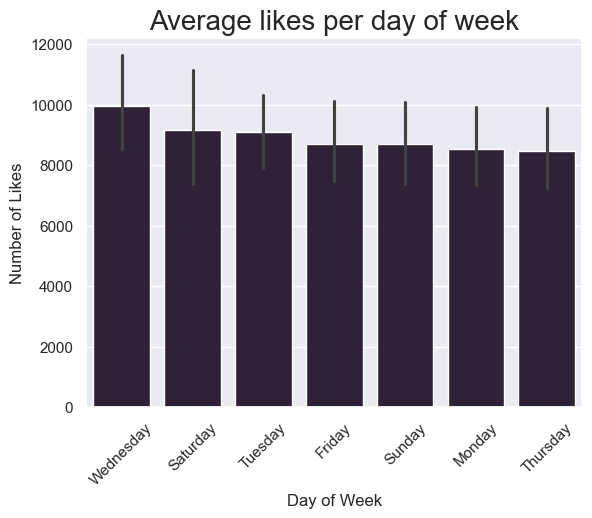

In [76]:
# Setting seaborn theme for more stylish visualizations
sns.set_theme(style="darkgrid", palette="mako")

# Making the order of bars for better result
avg_likes_day = archive_master.groupby("day_name")["favorite_count"].mean()
avg_likes_day = avg_likes_day.sort_values(ascending = False)
order = avg_likes_day.index

# Making the plot
sns.barplot(
    data = archive_master,
    x = "day_name",
    y = "favorite_count",
    # Adding order for better shape
    order = order
)

# Setting rotation for week days so they don't overlap
plt.xticks(rotation=45)

# Setting title and labels
plt.title(
    "Average likes per day of week", loc="center", fontdict={"fontsize": "20"}
)
plt.xlabel("Day of Week")
plt.ylabel("Number of Likes")

# Showing Plot
plt.show()

So **Wedenesday** was the day with highest average likes in the data

Meanwhile, **Thursday** was the least

<hr>

## Visualization : Is there a relationship between likes and retweets? 

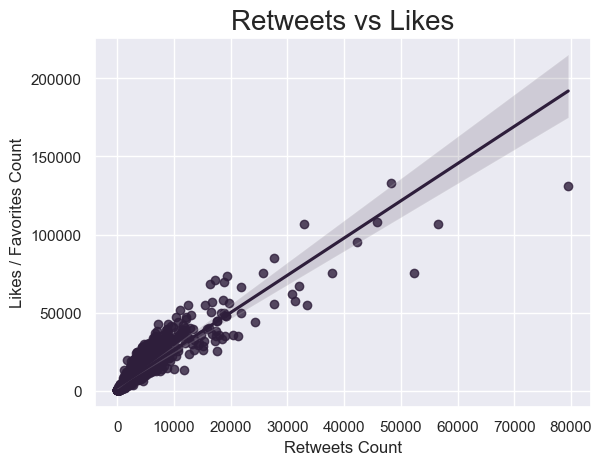

In [77]:
# Making the plot
sns.regplot(
    data = archive_master,
    x = "retweet_count",
    y = "favorite_count",
)

# Assigning title and labels
plt.title("Retweets vs Likes", fontdict={"fontsize": "20"})
plt.xlabel("Retweets Count")
plt.ylabel("Likes / Favorites Count")

# Displaying the plot
plt.show()

As shown in the scatter plot, it's a postitive correlation.

Where if the likes increase on a post that increases its popularity and the retweets number increases also.

Also, **most** of our data has likes and retweets in a range of 0 - 50,000

<hr>

Here, we have come to the end of our notebook, a full report of our work here is documented in :
<ul>
    <li><a href = "wrangle_report.pdf">Wrangle Report</a></li>
    <li><a href = "act_report.pdf">Act Report</a></li>
</ul>

<hr>

# Sources : 
- [Pandas Docs](https://pandas.pydata.org/docs/)
- [Stackoverflow](https://stackoverflow.com)
- [Regex101](https://regex101.com/)